# Nested and repeated data

## Nested data

Consider a hypothetical dataset containing information about pets and their toys. We could organize this information in two different tables (a pets table and a toys table). The toys table could contain a "Pet_ID" column that could be used to match each toy to the pet that owns it.

Another option in BigQuery is to organize all of the information in a single table, similar to the pets_and_toys table below.

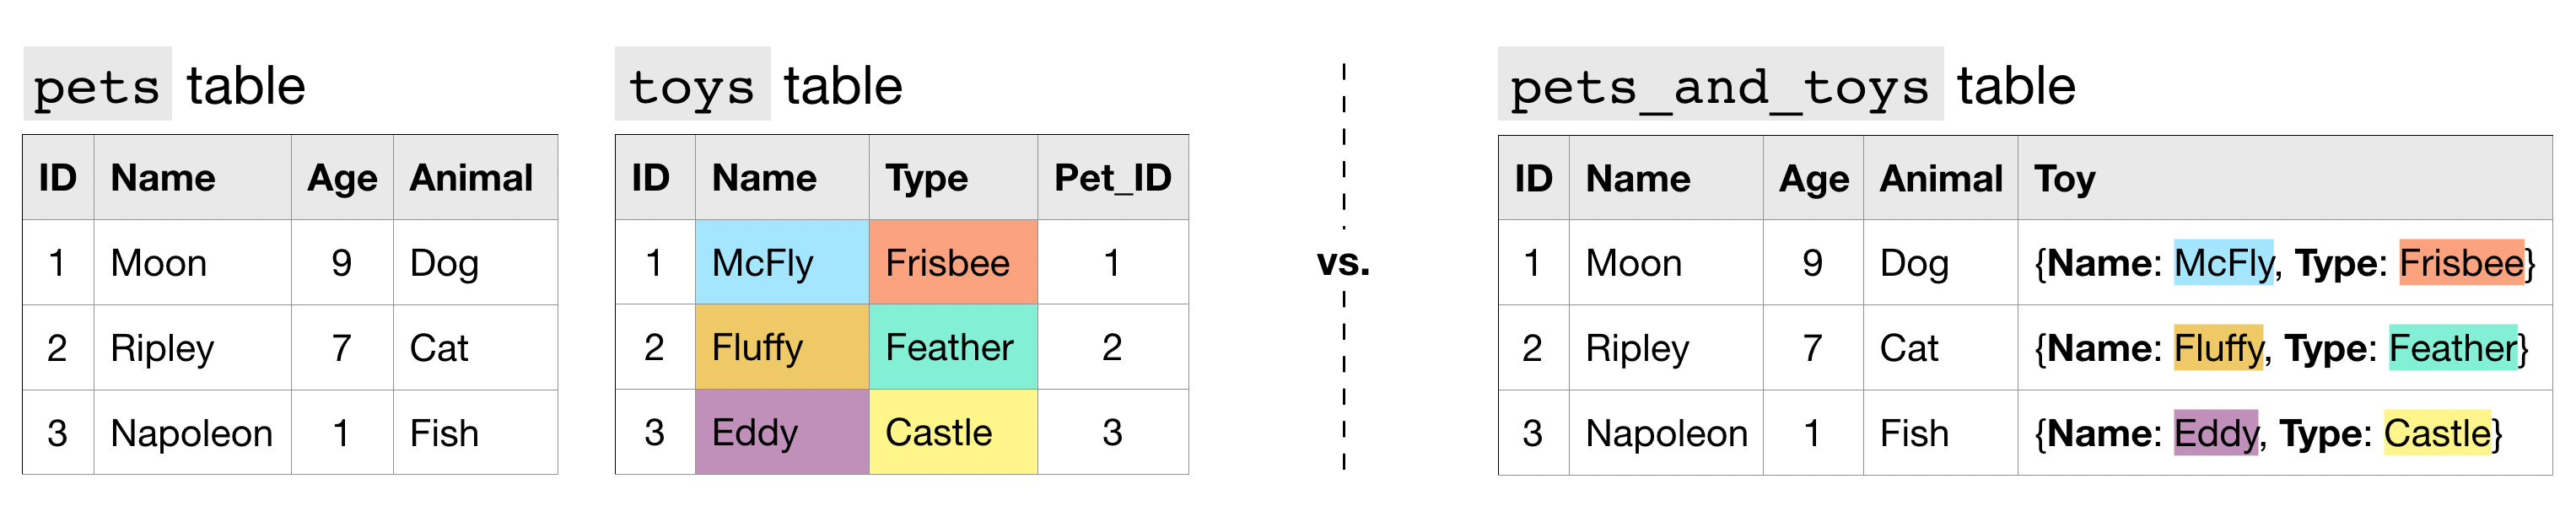

In this case, all of the information from the toys table is collapsed into a single column (the "Toy" column in the pets_and_toys table). We refer to the "Toy" column in the pets_and_toys table as a nested column, and say that the "Name" and "Type" fields are nested inside of it.

Nested columns have type STRUCT (or type RECORD)

To query a column with nested data, we need to identify each field in the context of the column that contains it:

Toy.Name refers to the "Name" field in the "Toy" column, and
Toy.Type refers to the "Type" field in the "Toy" column.

## Repeated data

Now consider the case where each pet can have multiple toys. In this case, to collapse this information into a single table, we need to leverage a different datatype.

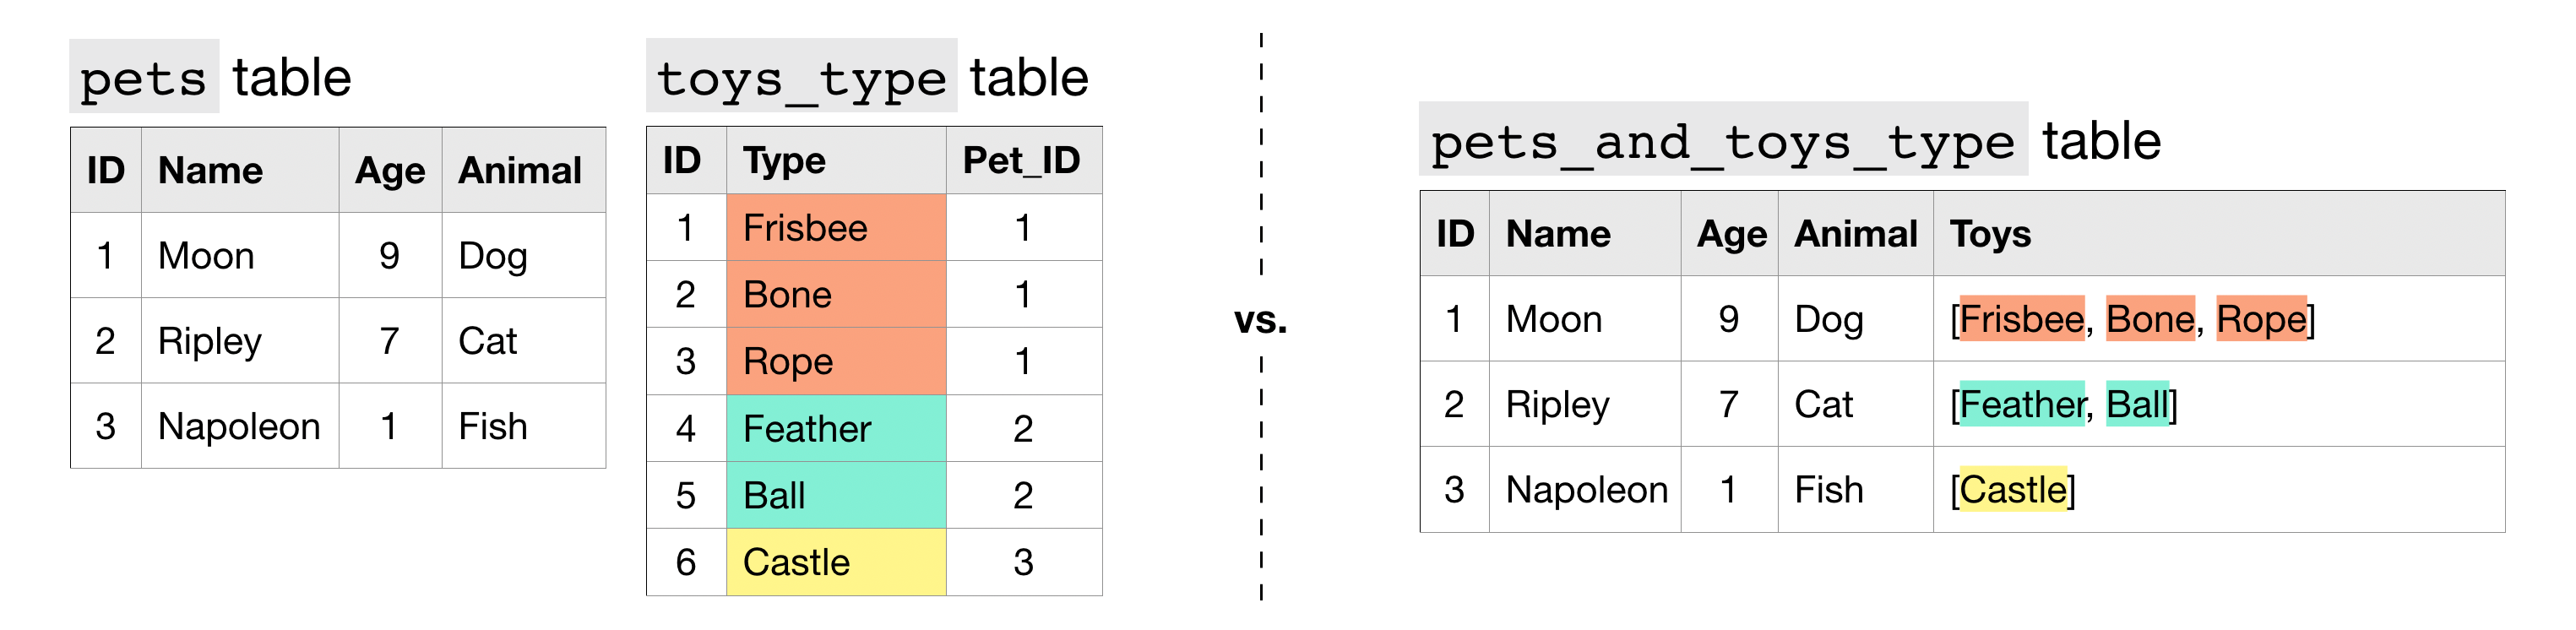

We say that the "Toys" column contains repeated data, because it permits more than one value for each row. This is reflected in the table schema below, where the mode of the "Toys" column appears as 'REPEATED'.


When querying repeated data, we need to put the name of the column containing the repeated data inside an UNNEST() function.

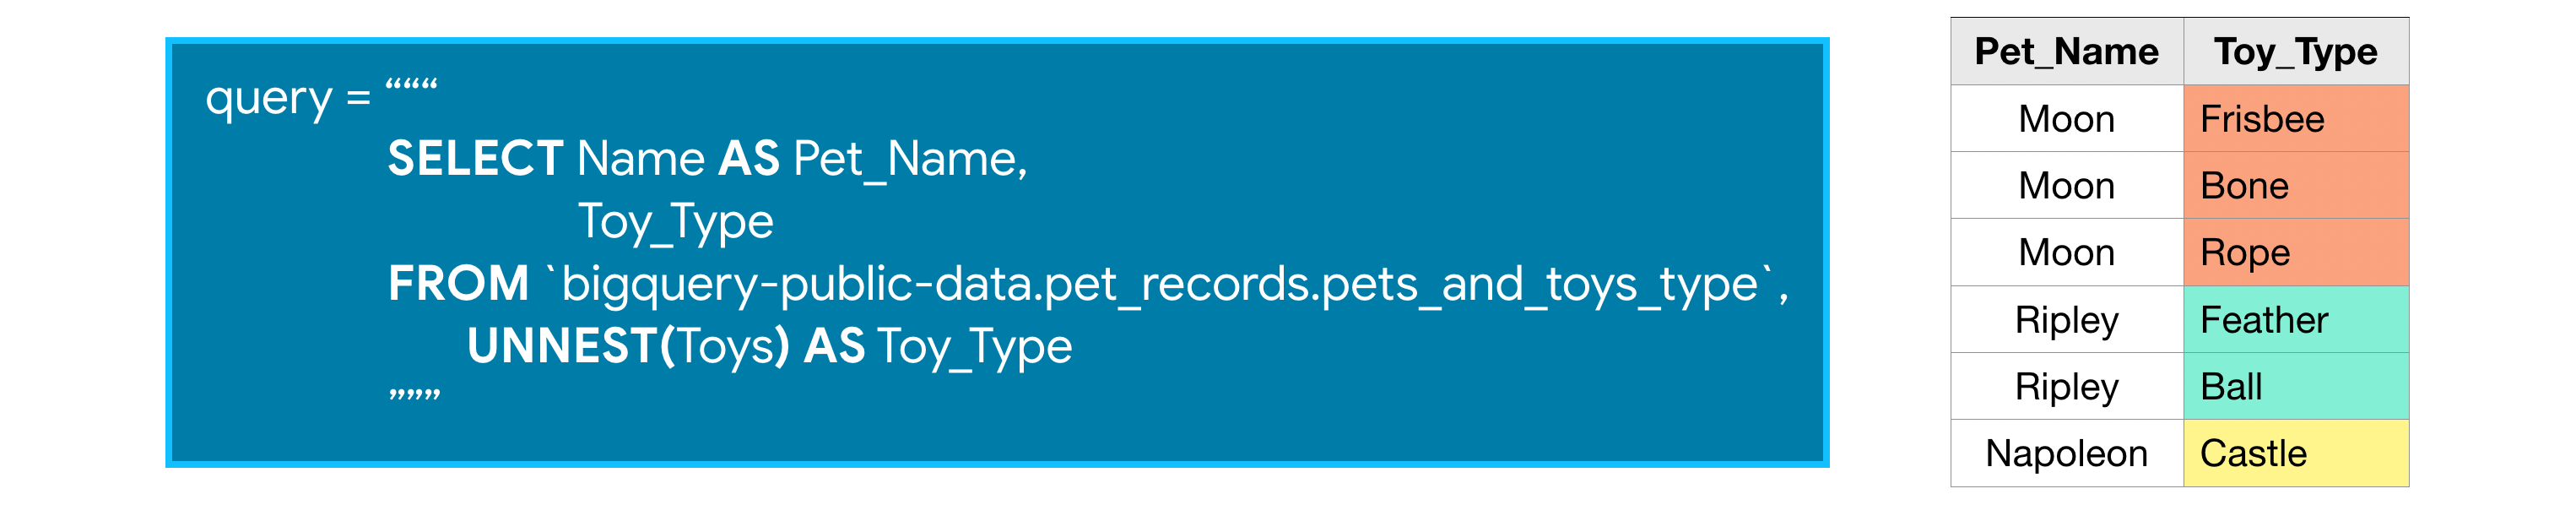

## Nested and repeated data

Now, what if pets can have multiple toys, and we'd like to keep track of both the name and type of each toy? In this case, we can make the "Toys" column both nested and repeated.

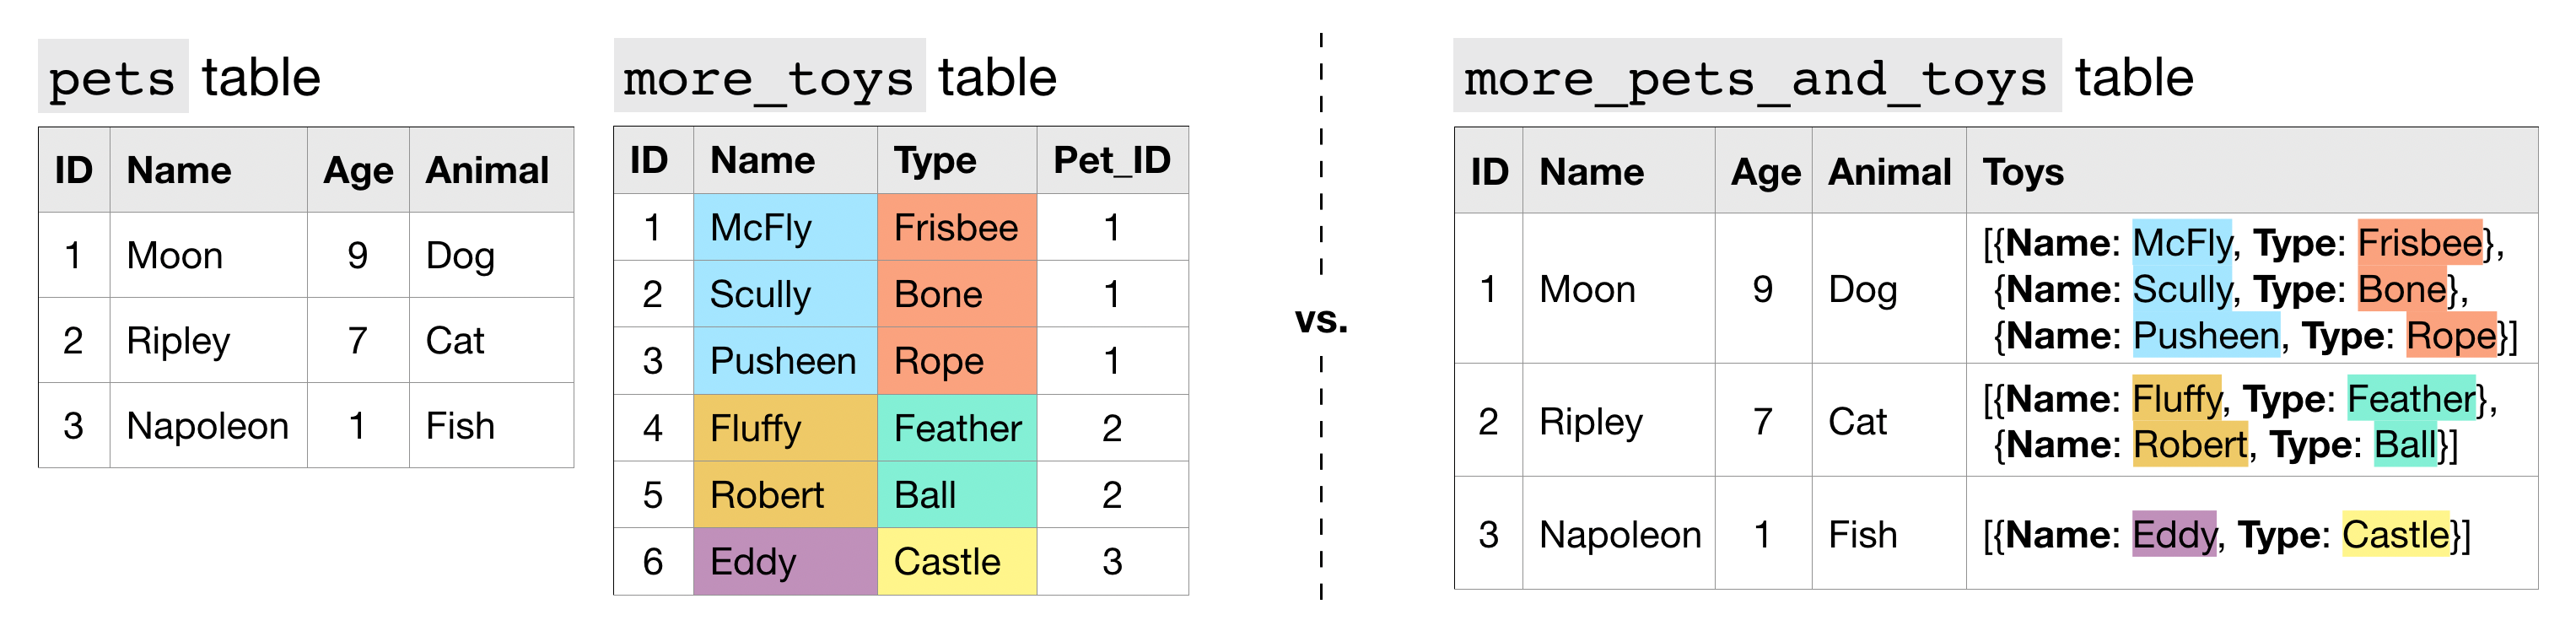

In the more_pets_and_toys table above, "Name" and "Type" are both fields contained within the "Toys" STRUCT, and each entry in both "Toys.Name" and "Toys.Type" is an ARRAY.

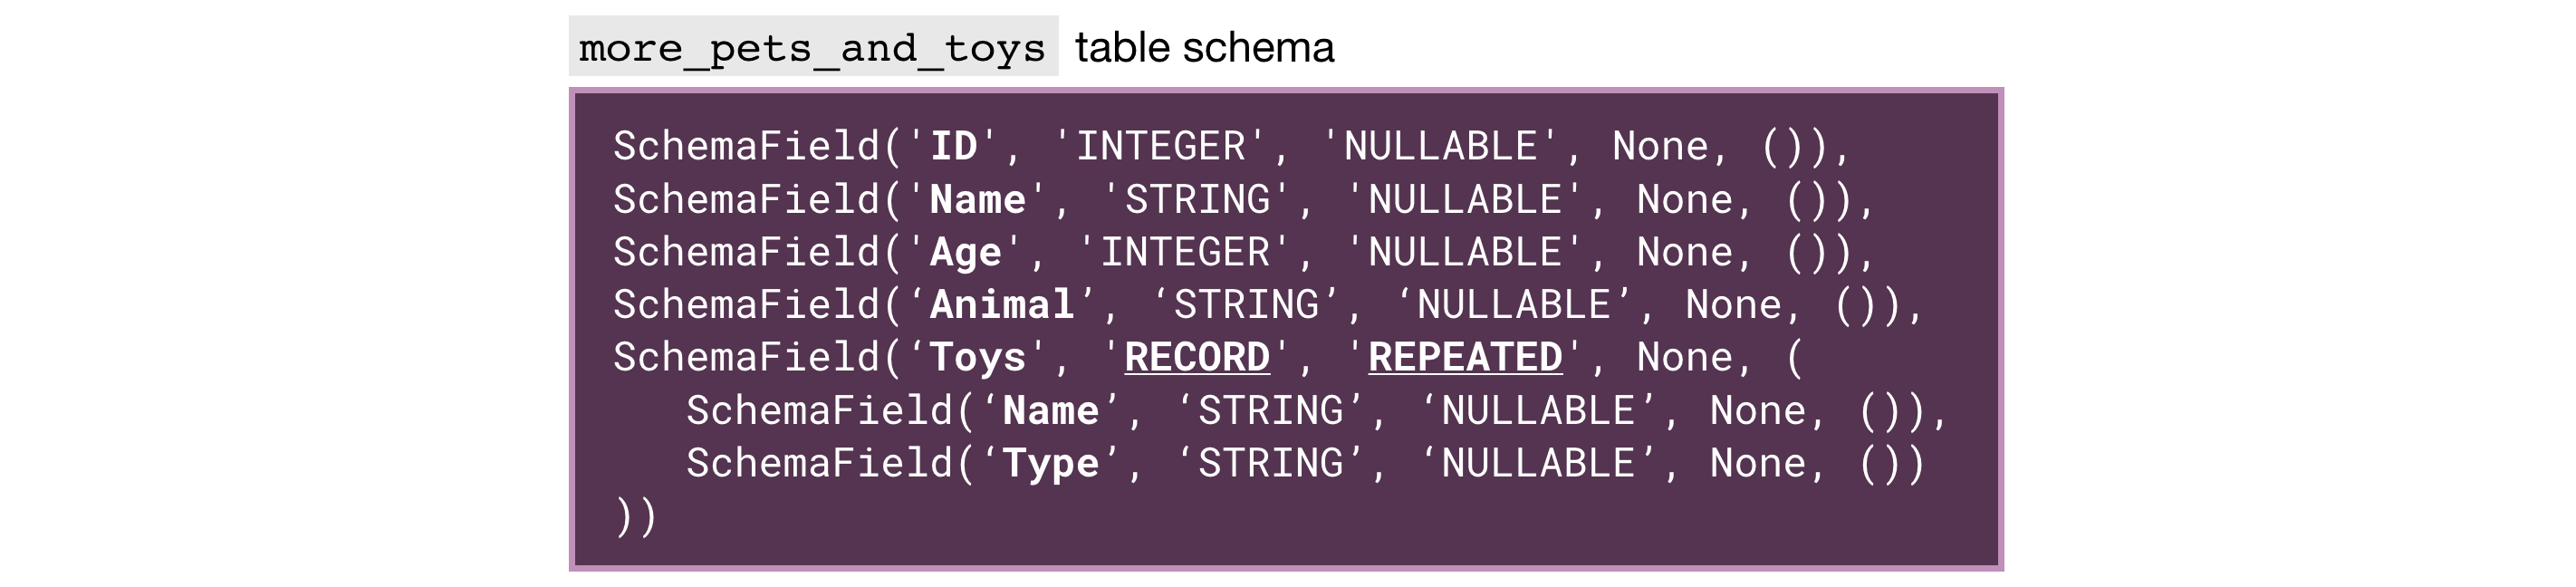

## Example

We'll work with the [Google Analytics Sample](https://www.kaggle.com/bigquery/google-analytics-sample) dataset. It contains information tracking the behavior of visitors to the Google Merchandise store, an e-commerce website that sells Google branded items.


In [2]:
from google.cloud import bigquery

client = bigquery.Client("sqlbigquery7711")

dataset_ref = client.dataset("google_analytics_sample", project="bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

table_ref = dataset_ref.table("ga_sessions_20170801")

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,<NA>,1,1501591568,1501591568,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': None, 'campaign': '(not set)'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'South...",[],"[{'hitNumber': 1, 'time': 0, 'hour': 5, 'minut...",3418334011779872055,None,None,Organic Search,Not Socially Engaged
1,<NA>,2,1501589647,1501589647,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Asia', 'subContinent': 'Souther...","[{'index': 4, 'value': 'APAC'}]","[{'hitNumber': 1, 'time': 0, 'hour': 5, 'minut...",2474397855041322408,None,None,Referral,Not Socially Engaged
2,<NA>,1,1501616621,1501616621,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Europe', 'subContinent': 'North...","[{'index': 4, 'value': 'EMEA'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",5870462820713110108,None,None,Referral,Not Socially Engaged
3,<NA>,1,1501601200,1501601200,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Firefox', 'browserVersion': 'not ...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 8, 'minut...",9397809171349480379,None,None,Referral,Not Socially Engaged
4,<NA>,1,1501615525,1501615525,20170801,"{'visits': 1, 'hits': 1, 'pageviews': 1, 'time...","{'referralPath': '/analytics/web/', 'campaign'...","{'browser': 'Chrome', 'browserVersion': 'not a...","{'continent': 'Americas', 'subContinent': 'Nor...","[{'index': 4, 'value': 'North America'}]","[{'hitNumber': 1, 'time': 0, 'hour': 12, 'minu...",6089902943184578335,None,None,Referral,Not Socially Engaged


In [7]:
for field in table.schema:
    print (field)

SchemaField('visitorId', 'INTEGER', 'NULLABLE', None, None, (), None)
SchemaField('visitNumber', 'INTEGER', 'NULLABLE', None, None, (), None)
SchemaField('visitId', 'INTEGER', 'NULLABLE', None, None, (), None)
SchemaField('visitStartTime', 'INTEGER', 'NULLABLE', None, None, (), None)
SchemaField('date', 'STRING', 'NULLABLE', None, None, (), None)
SchemaField('totals', 'RECORD', 'NULLABLE', None, None, (SchemaField('visits', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('hits', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('bounces', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('transactions', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('newVisits', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('screenview

In our first query against this table, we'll work with the "totals" and "device" columns. They are NESTED DATA. 

In [12]:
totals_schema = [field for field in table.schema if field.name == "totals"][0].fields

# Display schema of 'totals' field
print("Schema of 'totals' field:")
for subfield in totals_schema:
    print(f"- {subfield.name} ({subfield.field_type}, {subfield.mode})")

print("SCHEMA field for the 'totals' column:")
print(table.schema[5].fields)

# Display schema of 'device' field
device_schema = [field for field in table.schema if field.name == "device"][0].fields

print("Schema of 'device' field:")
for subfield in device_schema:
    print(f"- {subfield.name} ({subfield.field_type}, {subfield.mode})")




Schema of 'totals' field:
- visits (INTEGER, NULLABLE)
- hits (INTEGER, NULLABLE)
- pageviews (INTEGER, NULLABLE)
- timeOnSite (INTEGER, NULLABLE)
- bounces (INTEGER, NULLABLE)
- transactions (INTEGER, NULLABLE)
- transactionRevenue (INTEGER, NULLABLE)
- newVisits (INTEGER, NULLABLE)
- screenviews (INTEGER, NULLABLE)
- uniqueScreenviews (INTEGER, NULLABLE)
- timeOnScreen (INTEGER, NULLABLE)
- totalTransactionRevenue (INTEGER, NULLABLE)
- sessionQualityDim (INTEGER, NULLABLE)
SCHEMA field for the 'totals' column:
(SchemaField('visits', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('hits', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('pageviews', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('timeOnSite', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('bounces', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('transactions', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('transactionRevenue', 'INTEGER', 'NULLABLE', None

We refer to the "browser" field (which is nested in the "device" column) and the "transactions" field (which is nested inside the "totals" column) as device.browser and totals.transactions in the query below:



In [13]:
# Query to count the number of transactions per browser
query = """
        SELECT device.browser AS device_browser,
            SUM(totals.transactions) as total_transactions
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
        GROUP BY device_browser
        ORDER BY total_transactions DESC
        """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe()
result.head()

,device_browser,total_transactions
0,Chrome,41
1,Safari,3
2,Firefox,1
3,Edge,<NA>
4,Coc Coc,<NA>


By storing the information in the "device" and "totals" columns as STRUCTs (as opposed to separate tables), we avoid expensive JOINs. This increases performance and keeps us from having to worry about JOIN keys (and which tables have the exact data we need).

Now we'll work with the "hits" column as an example of data that is BOTH NESTED AND REPEATED. Since:

- "hits" is a STRUCT (contains nested data) and is repeated,
- "hitNumber", "page", and "type" are all nested inside the "hits" column, and "pagePath" is nested inside the "page" field.

We can query these fields with the following syntax:

In [14]:
# Query to determine most popular landing point on the website
query = """
        SELECT hits.page.pagePath as path,
            COUNT(hits.page.pagePath) as counts
        FROM `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`, 
            UNNEST(hits) as hits
        WHERE hits.type="PAGE" and hits.hitNumber=1
        GROUP BY path
        ORDER BY counts DESC
        """

# Run the query, and return a pandas DataFrame
result = client.query(query).result().to_dataframe()
result.head()

,path,counts
0,/home,1257
1,/google+redesign/shop+by+brand/youtube,587
2,/google+redesign/apparel/mens/mens+t+shirts,117
3,/signin.html,78
4,/basket.html,35


## Exercises
Now we are going to draw interesting insights from the [GitHub Repos](https://www.kaggle.com/github/github-repos) dataset.  

In [3]:
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

table_ref = dataset_ref.table("sample_commits")

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,commit,tree,parent,author,committer,subject,message,trailer,difference,difference_truncated,repo_name,encoding
0,afdba32e2a9ea729a9f9f280dbf6c718773c7ded,d77cca8a096e5320f3194d4a6ca1b4fef2dc9b99,[d65e55d4999b394e37ffe12543ecd2a17b7c44fc],"{'name': 'Jason Gunthorpe', 'email': 'a99b91d7...","{'name': 'Peter Huewe', 'email': '014f16385c5a...",tpm: Pull everything related to /dev/tpmX into...,tpm: Pull everything related to /dev/tpmX into...,"[{'key': 'Signed-off-by', 'value': 'Jason Gunt...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None
1,eb846d9f147455e4e5e1863bfb5e31974bb69b7c,443efbb146c7824508be817923bab04c2185810e,[3af6b35261182ff185db1f0fd271254147e2663e],"{'name': 'Hannes Reinecke', 'email': 'b0d1e9e4...","{'name': 'Christoph Hellwig', 'email': '923f77...",scsi: rename SERVICE_ACTION_IN to SERVICE_ACTI...,scsi: rename SERVICE_ACTION_IN to SERVICE_ACTI...,"[{'key': 'Signed-off-by', 'value': 'Hannes Rei...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None
2,f8798ccbefc0e4ef7438c080b7ba0410738c8cfa,9133440693c02314f1f6f95629b3594ce24ad0f8,[261e767628bb5971b9032439818237cc8511ea94],"{'name': 'Yong Zhang', 'email': '34add0fe16a1f...","{'name': 'Florian Tobias Schandinat', 'email':...",video: irq: Remove IRQF_DISABLED,video: irq: Remove IRQF_DISABLED\n\nSince comm...,"[{'key': 'Signed-off-by', 'value': 'Yong Zhang...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None
3,b83ae6d421435c6204150300f1c25bfbd39cd62b,99c6b661ab7de05c2fd49aa62624d2d6bf8abc69,[de1414a654e66b81b5348dbc5259ecf2fb61655e],"{'name': 'Christoph Hellwig', 'email': '923f77...","{'name': 'Jens Axboe', 'email': 'cd8c6775e60d6...",fs: remove mapping->backing_dev_info,fs: remove mapping->backing_dev_info\n\nNow th...,"[{'key': 'Signed-off-by', 'value': 'Christoph ...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None
4,aaabee8b7686dfe49f10289cb4b7a817b99e5dd9,7ccc6cf829a93d46daf484164a5466c91eca2efa,"[795e9364215dc98b1dea888ebae22383ecbbb92a, 2f2...","{'name': 'Luciano Coelho', 'email': 'd1ef58086...","{'name': 'Luciano Coelho', 'email': 'd1ef58086...",Merge branch 'wl12xx-next' into for-linville,Merge branch 'wl12xx-next' into for-linville\n...,"[{'key': 'Conflicts', 'value': '', 'email': No...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",<NA>,torvalds/linux,None


In [4]:
table.schema

[SchemaField('commit', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('tree', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('parent', 'STRING', 'REPEATED', None, None, (), None),
 SchemaField('author', 'RECORD', 'NULLABLE', None, None, (SchemaField('name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('email', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, None, (), None)), None),
 SchemaField('committer', 'RECORD', 'NULLABLE', None, None, (SchemaField('name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('email', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('time_sec', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('tz_offset', 'INTEGER', 'NULLABLE', None, None, (), None), SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, None, ()

### 1) Who had the most commits in 2016?

GitHub is the most popular place to collaborate on software projects. A GitHub **repository** (or repo) is a collection of files associated with a specific project, and a GitHub **commit** is a change that a user has made to a repository.  We refer to the user as a **committer**.

The `sample_commits` table contains a small sample of GitHub commits, where each row corresponds to different commit.

Write a query to find the individuals with the most commits in this table in 2016.  Your query should return a table with two columns:
- `committer_name` - contains the name of each individual with a commit (from 2016) in the table
- `num_commits` - shows the number of commits the individual has in the table (from 2016)

Sort the table, so that people with more commits appear first.

**NOTE**: You can find the name of each committer and the date of the commit under the "committer" column, in the "name" and "date" child fields, respectively.

In [8]:
query = """ 
        SELECT committer.name AS committer_name, COUNT(*) AS num_commits
        FROM `bigquery-public-data.github_repos.sample_commits`
        WHERE EXTRACT(YEAR FROM committer.date) = 2016
        GROUP BY committer_name
        ORDER BY num_commits DESC
"""

result = client.query(query).result().to_dataframe()

result.head()

,committer_name,num_commits
0,Greg Kroah-Hartman,3545
1,David S. Miller,3120
2,TensorFlower Gardener,2449
3,Linus Torvalds,2424
4,Benjamin Pasero,1127


### 2) Look at languages!
Each row of the `languages` table corresponds to a different repository.  
- The "repo_name" column contains the name of the repository,
- the "name" field in the "language" column contains the programming languages that can be found in the repo, and 
- the "bytes" field in the "language" column has the size of the files (in bytes, for the corresponding language).

Run the following code cell to print the table schema.

In [9]:
# Construct a reference to the "languages" table
table_ref = dataset_ref.table("languages")

# API request - fetch the table
languages_table = client.get_table(table_ref)

# Preview the first five lines of the table
client.list_rows(languages_table, max_results=5).to_dataframe()

,repo_name,language
0,lemi136/puntovent,"[{'name': 'C', 'bytes': 80}]"
1,taxigps/nctool,"[{'name': 'C', 'bytes': 4461}]"
2,ahy1/strbuf,"[{'name': 'C', 'bytes': 5573}]"
3,nleiten/mod_rpaf-ng,"[{'name': 'C', 'bytes': 30330}]"
4,kmcallister/alameda,"[{'name': 'C', 'bytes': 17077}]"


In [10]:
languages_table.schema

[SchemaField('repo_name', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('language', 'RECORD', 'REPEATED', None, None, (SchemaField('name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('bytes', 'INTEGER', 'NULLABLE', None, None, (), None)), None)]

In [12]:
query = """ 
        SELECT *
        FROM `bigquery-public-data.github_repos.languages`,
          UNNEST(language)
"""

result = client.query(query).result().to_dataframe()

result.head()   

,repo_name,language,name,bytes
0,NicolFrey2/Nicole,"[{'name': 'Assembly', 'bytes': 274628}, {'name...",Shell,1104
1,scottellis/linux-beagleboard,"[{'name': 'Assembly', 'bytes': 10137339}, {'na...",Makefile,1434493
2,Eih3/CHIP-linux,"[{'name': 'Assembly', 'bytes': 10106479}, {'na...",Makefile,1425025
3,WarpedRom/android_external_busybox,"[{'name': 'Assembly', 'bytes': 4450}, {'name':...",Ruby,2473
4,OpenInkpot-archive/iplinux-binutils-host,"[{'name': 'Assembly', 'bytes': 10219499}, {'na...",Perl6,27749


### 3) What's the most popular programming language?
Write a query to leverage the information in the languages table to determine which programming languages appear in the most repositories. The table returned by your query should have two columns:

- language_name - the name of the programming language
- num_repos - the number of repositories in the languages table that use the programming language

In [13]:
query = """ 
        WITH cte AS(
        SELECT name
            FROM `bigquery-public-data.github_repos.languages`,
            UNNEST(language)
        )
        SELECT name as language_name, COUNT(*) as num_repos
        FROM cte
        GROUP BY language_name
        ORDER BY num_repos DESC
"""

result = client.query(query).result().to_dataframe()

result.head()   

,language_name,num_repos
0,JavaScript,1099966
1,CSS,807826
2,HTML,777433
3,Shell,640886
4,Python,550905


### 4) Which languages are used in the repository with the most languages?

For this question, you'll restrict your attention to the repository with name `'polyrabbit/polyglot'`.

Write a query that returns a table with one row for each language in this repository.  The table should have two columns:
- `name` - the name of the programming language
- `bytes` - the total number of bytes of that programming language

Sort the table by the `bytes` column so that programming languages that take up more space in the repo appear first.

In [18]:
query = """ 
        WITH cte AS(
        SELECT *
            FROM `bigquery-public-data.github_repos.languages`,
            UNNEST(language)
        WHERE repo_name = 'polyrabbit/polyglot'
        )
        SELECT name, bytes
        FROM cte
        ORDER BY bytes DESC
"""

result = client.query(query).result().to_dataframe()

result.head()   

,name,bytes
0,Lasso,834726
1,C,819142
2,Mercury,709952
3,Objective-C,495392
4,Game Maker Language,298131
